# AI Assignment 3, part 2

## Import Libraries

In [ ]:
%pip install kagglehub
%pip install tensorflow
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install nltk
%pip install scikit-learn
%pip install opencv-python
%pip install pandas

In [45]:
import os
import kagglehub
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

## Load and Preprocess Data

### Download the data, pull the directories

In [5]:
path = kagglehub.dataset_download("puneet6060/intel-image-classification")
print("Path to dataset files:", path)

train_dir = os.path.join(path, 'seg_train/seg_train')
test_dir = os.path.join(path, 'seg_test/seg_test')

print("Train directory:", train_dir)
print("Test directory:", test_dir)

100%|██████████| 346M/346M [00:03<00:00, 108MB/s]  

Extracting files...


Path to dataset files: C:\Users\tyler\.cache\kagglehub\datasets\puneet6060\intel-image-classification\versions\2
Train directory: C:\Users\tyler\.cache\kagglehub\datasets\puneet6060\intel-image-classification\versions\2\seg_train/seg_train
Test directory: C:\Users\tyler\.cache\kagglehub\datasets\puneet6060\intel-image-classification\versions\2\seg_test/seg_test


### Define load_images function for identifying by class

In [6]:
#
def load_images(folder):

  images = []
  labels = []
  class_names = os.listdir(folder)
  class_indices = {class_name: i for i, class_name in enumerate(class_names)}

  for class_name in class_names:
    class_folder = os.path.join(folder, class_name)
    if os.path.isdir(class_folder):
      for image_name in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_name)
        image = cv2.imread(image_path)
        if image is not None:
          image = cv2.resize(image, (128, 128))
          images.append(image)
          labels.append(class_indices[class_name])

  return np.array(images), np.array(labels), class_names

X_train, Y_train, train_class_names = load_images(train_dir)

X_val, Y_val, val_class_names = load_images(test_dir)

print('Training data shape:', X_train.shape)
print('Validation data shape:', X_val.shape)
print('Classes:', train_class_names)

print("Shape of Y_train:", Y_train.shape)  # Should be (14034, num_classes)
print("Shape of Y_val:", Y_val.shape)      # Should be (3000, num_classes)


Training data shape: (14034, 128, 128, 3)
Validation data shape: (3000, 128, 128, 3)
Classes: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Shape of Y_train: (14034,)
Shape of Y_val: (3000,)


### Normalize image pixel values, use one-hot encoding

In [7]:
X_train = X_train / 255.0
X_val = X_val / 255.0

Y_train = to_categorical(Y_train, num_classes=len(train_class_names))
Y_val = to_categorical(Y_val, num_classes=len(val_class_names))

# Verify the shapes after encoding
print("Shape of Y_train after encoding:", Y_train.shape)  # Should be (14034, 6)
print("Shape of Y_val after encoding:", Y_val.shape)      # Should be (3000, 6)


Shape of Y_train after encoding: (14034, 6)
Shape of Y_val after encoding: (3000, 6)


## Train CNN Models

### Model 1: 3 convolution layers

In [46]:
learning_rate = .01
optimizer = SGD(learning_rate=0.01, momentum=0.9)
batch_size = 64

model_3conv = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_class_names), activation='softmax')

])

model_3conv.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history_3conv = model_3conv.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=batch_size)

c:\Users\tyler\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - accuracy: 0.3762 - loss: 1.4990 - val_accuracy: 0.5623 - val_loss: 1.0866
Epoch 2/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.5656 - loss: 1.1020 - val_accuracy: 0.6543 - val_loss: 0.8980
Epoch 3/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.6317 - loss: 0.9344 - val_accuracy: 0.6670 - val_loss: 0.8174
Epoch 4/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.6911 - loss: 0.7997 - val_accuracy: 0.7180 - val_loss: 0.7179
Epoch 5/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.7198 - loss: 0.7389 - val_accuracy: 0.7487 - val_loss: 0.6656
Epoch 6/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.7481 - loss: 0.6633 - val_accuracy: 0.7530 - val_loss: 0.6653
Epoch 7/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.7885 - loss: 0.5743 - val_accuracy: 0.7717 - val_loss: 0.6294
Epoch 8/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.8143 - loss: 0.5150 

### Model 2

In [48]:

model_6conv = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(train_class_names), activation='softmax')
])


model_6conv.compile(optimizer=SGD(learning_rate=learning_rate, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

history_6conv = model_6conv.fit(
    X_train, Y_train, 
    validation_data=(X_val, Y_val), 
    epochs=10, 
    batch_size=batch_size
)



c:\Users\tyler\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 60s 269ms/step - accuracy: 0.3327 - loss: 1.5987 - val_accuracy: 0.5817 - val_loss: 1.0445
Epoch 2/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 60s 272ms/step - accuracy: 0.5794 - loss: 1.0708 - val_accuracy: 0.6393 - val_loss: 0.9132
Epoch 3/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 60s 274ms/step - accuracy: 0.6340 - loss: 0.9275 - val_accuracy: 0.6637 - val_loss: 0.8368
Epoch 4/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 59s 269ms/step - accuracy: 0.6753 - loss: 0.8364 - val_accuracy: 0.7103 - val_loss: 0.7496
Epoch 5/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 60s 272ms/step - accuracy: 0.7230 - loss: 0.7261 - val_accuracy: 0.7080 - val_loss: 0.7731
Epoch 6/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 58s 265ms/step - accuracy: 0.7468 - loss: 0.6791 - val_accuracy: 0.7483 - val_loss: 0.6602
Epoch 7/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 58s 266ms/step - accuracy: 0.7591 - loss: 0.6361 - val_accuracy: 0.7417 - val_loss: 0.6832
Epoch 8/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 58s 264ms/step - accuracy: 0.7906 - loss: 0

## Evaluating the performance of the models

### Plotting the outcomes of the two models

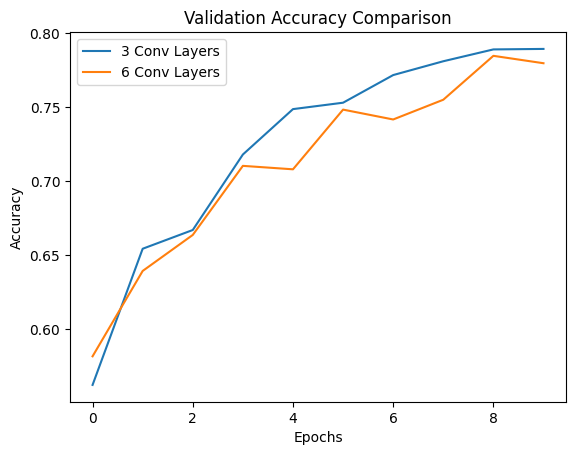

<Figure size 640x480 with 0 Axes>

In [49]:
# Plot validation accuracy for both models
plt.plot(history_3conv.history['val_accuracy'], label='3 Conv Layers')
plt.plot(history_6conv.history['val_accuracy'], label='6 Conv Layers')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('run_3_graph.png')

### Calculate Predictive metrics, Evaluation metrics

In [51]:

# Predict for both models
y_pred_3conv = model_3conv.predict(X_val)
y_pred_6conv = model_6conv.predict(X_val)

# Convert predictions to class indices
y_pred_3conv_classes = np.argmax(y_pred_3conv, axis=1)
y_pred_6conv_classes = np.argmax(y_pred_6conv, axis=1)
y_val_classes = np.argmax(Y_val, axis=1)  # True class indices

# Compute metrics for 3-layer CNN
val_loss_3conv, val_acc_3conv = model_3conv.evaluate(X_val, Y_val)
precision_3conv = precision_score(y_val_classes, y_pred_3conv_classes, average='macro')
recall_3conv = recall_score(y_val_classes, y_pred_3conv_classes, average='macro')
f1_3conv = f1_score(y_val_classes, y_pred_3conv_classes, average='macro')

# Compute metrics for 6-layer CNN
# val_loss_6conv, val_acc_6conv, val_recall_6conv, val_precision_6conv = model_6conv.evaluate(X_val, Y_val)
val_loss_6conv, val_acc_6conv = model_6conv.evaluate(X_val, Y_val)

precision_6conv = precision_score(y_val_classes, y_pred_6conv_classes, average='macro')
recall_6conv = recall_score(y_val_classes, y_pred_6conv_classes, average='macro')
f1_6conv = f1_score(y_val_classes, y_pred_6conv_classes, average='macro')

# Prepare results for the current run
current_results = {
    'Model': ['3 Conv Layers', '6 Conv Layers'],
    'Validation Loss': [val_loss_3conv, val_loss_6conv],
    'Validation Accuracy': [val_acc_3conv, val_acc_6conv],
    'Precision': [precision_3conv, precision_6conv],
    'Recall': [recall_3conv, recall_6conv],
    'F1 Score': [f1_3conv, f1_6conv],
    'Optimizer': ['SGD', 'SGD'],
    'Learning Rate': [learning_rate, learning_rate],  
    'Batch Size': [32,32],       
    'Epochs': [10,10]
}


# Convert to a DataFrame
current_results_df = pd.DataFrame(current_results)


# Filepath to save results
results_filepath = 'cnn_results.csv'

# Append to CSV if file exists, otherwise create a new file
if os.path.exists(results_filepath):
    previous_results_df = pd.read_csv(results_filepath)
    combined_results_df = pd.concat([previous_results_df, current_results_df], ignore_index=True)
else:
    combined_results_df = current_results_df

# Save the combined results to CSV
combined_results_df.to_csv(results_filepath, index=False)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8041 - loss: 0.5844
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8422 - loss: 0.4988
